<h1>Task - Linear Regression</h1>
<h3>To Do: -</h3>

    1) Predict the percentage of student based on the number of study hours.
    2) This is a simple linear regression task as it involves just 2 variables.
    3) You can use R, Python, SAS Enterprise Miner or any other tool.
    4) What will be predicted score if a student studies for 9.25 hrs/day?

<h1> Let's Get Started</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Task1-Dataset.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


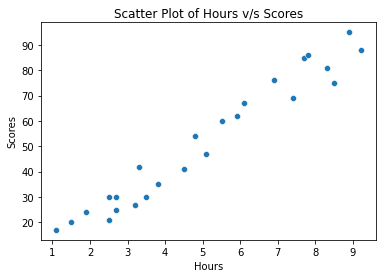

In [7]:
plt.title("Scatter Plot of Hours v/s Scores")
sns.scatterplot(data = data, x = "Hours", y = "Scores")
plt.show()

In [12]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
regr = LinearRegression().fit(X_train, y_train)

In [16]:
print(f"Intercept    : {regr.intercept_}")
print(f"Coefficients : {regr.coef_[0]}")

Intercept    : 2.826892353899737
Coefficients : 9.682078154455697


In [17]:
l = regr.coef_*X+regr.intercept_

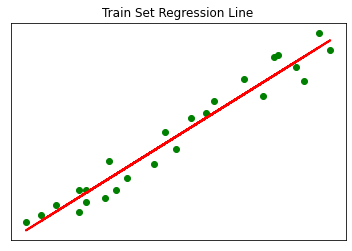

In [18]:
plt.title("Train Set Regression Line")
plt.scatter(X, y, color = "green")
plt.plot(X, l, color = "red", linewidth = 2)

plt.xticks( () )
plt.yticks( () )

plt.show()

<h1>Predictions</h1>

In [20]:
y_pred = regr.predict(X_test)
predictions = pd.DataFrame({"Hours":X_test.flatten(), "Actual_Score":y_test, "Predicted_Score":y_pred} )
predictions

,Hours,Actual_Score,Predicted_Score
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


<h1>Evaluating Model</h1>

In [21]:
# The Mean Squared Error
print("Mean Squared Error: %0.2f" % mean_squared_error(X_test, y_pred))

#The coefficient of determinant: 1 is perfect prediction
print("Coefficient of Determination: %0.2f" % r2_score(X_test, y_pred))

Mean Squared Error: 2733.77
Coefficient of Determination: -494.82


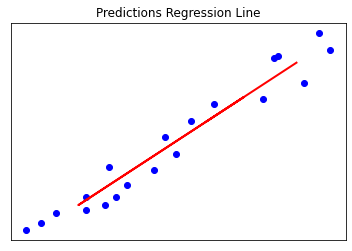

In [22]:
plt.title("Predictions Regression Line")
plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_test, y_pred, color = "red", linewidth = 2)

plt.xticks( () )
plt.yticks( () )

plt.show()

<h1>Prediction For The Task</h1>

In [23]:
value = np.array(9.25)
pred = regr.predict(value.reshape(-1, 1))
print(f"If you spend {value} hrs/day, then you will get your score  = {pred[0]}")

If you spend 9.25 hrs/day, then you will get your score  = 92.38611528261494


<h1>Thank You :)</h1>